In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import animalhelper as ah

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('master_df.csv', index_col = 0)

In [3]:
df['age'] = df['age_upon_intake'].apply(lambda x: ah.get_days(x))

In [4]:
df_sur = df[df['intake_type'] == 'Owner Surrender']

In [41]:
df_sur.columns.values

array(['age_upon_intake', 'animal_id', 'datetime_in', 'intake_condition',
       'intake_type', 'sex_upon_intake', 'age_upon_outcome',
       'animal_type', 'breed', 'color', 'date_of_birth', 'datetime_out',
       'name', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age'], dtype=object)

TypeError: nan is not a string

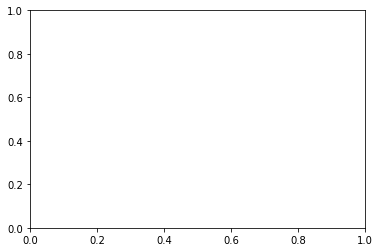

In [45]:
plt.bar(df_sur['outcome_type'].unique(), df_sur['outcome_type'].value_counts());

## Fill nans

In [61]:
df['name'] = df['name'].fillna('None')

In [66]:
df['name'] = df['name'].apply(lambda x: ah.encode_name(x))

In [69]:
df['outcome_subtype'].fillna('Unknown', inplace=True)

## Drop all other small na's

We should drop less than 50 observations in this way.

In [73]:
df = df.dropna()

## Drop rows with duplicate animal id

In [79]:
df.columns.values

array(['age_upon_intake', 'animal_id', 'datetime_in', 'intake_condition',
       'intake_type', 'sex_upon_intake', 'age_upon_outcome',
       'animal_type', 'breed', 'color', 'date_of_birth', 'datetime_out',
       'name', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age'], dtype=object)

In [81]:
df = df.drop_duplicates(subset='animal_id')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71964 entries, 0 to 100229
Data columns (total 17 columns):
age_upon_intake     71964 non-null object
animal_id           71964 non-null object
datetime_in         71964 non-null object
intake_condition    71964 non-null object
intake_type         71964 non-null object
sex_upon_intake     71964 non-null object
age_upon_outcome    71964 non-null object
animal_type         71964 non-null object
breed               71964 non-null object
color               71964 non-null object
date_of_birth       71964 non-null object
datetime_out        71964 non-null object
name                71964 non-null int64
outcome_subtype     71964 non-null object
outcome_type        71964 non-null object
sex_upon_outcome    71964 non-null object
age                 71964 non-null int64
dtypes: int64(2), object(15)
memory usage: 9.9+ MB


In [91]:
df = df.reset_index()

We're left with ~72,000 observations.

## Get spayed/neutered status and gender

In [92]:
df['sex_upon_intake'].head(10)

0    Spayed Female
1      Intact Male
2    Intact Female
3    Neutered Male
4    Neutered Male
5      Intact Male
6    Neutered Male
7      Intact Male
8    Intact Female
9    Intact Female
Name: sex_upon_intake, dtype: object

In [97]:
df.drop(labels=['index'], inplace=True, axis=1)

In [98]:
df['gender'] = df['sex_upon_intake'].apply(lambda x: ah.get_gender(x))

In [102]:
df['sex_upon_intake'].value_counts()

Intact Male      23843
Intact Female    22631
Neutered Male     9949
Spayed Female     8774
Unknown           6767
Name: sex_upon_intake, dtype: int64

In [105]:
df['sex_upon_intake'] = df['sex_upon_intake'].apply(lambda x: ah.get_fixed_status(x))

In [110]:
df.rename({'sex_upon_intake': 'fixed_status'}, axis=1, inplace=True)

In [111]:
df.to_csv('master_df.csv')

## Get datetime information

In [115]:
df['datetime_in'] = pd.to_datetime(df['datetime_in'])

In [122]:
df['dow'] = df['datetime_in'].dt.dayofweek

In [8]:
df.to_csv('master_df.csv')

In [11]:
df = pd.read_csv('master_df.csv', index_col = 0)

In [12]:
df.head()

,age_upon_intake,animal_id,datetime_in,intake_condition,intake_type,fixed_status,age_upon_outcome,animal_type,breed,color,date_of_birth,datetime_out,name,outcome_subtype,outcome_type,sex_upon_outcome,age,gender,dow
0,8 years,A706918,2015-07-05 12:59:00,Normal,Stray,fixed,8 years,Dog,English Springer Spaniel,White/Liver,2007-07-05T00:00:00,2015-07-05T15:13:00,1,Unknown,Return to Owner,Spayed Female,2920,1,6
1,11 months,A724273,2016-04-14 18:43:00,Normal,Stray,intact,1 year,Dog,Basenji Mix,Sable/White,2015-04-17T00:00:00,2016-04-21T17:17:00,1,Unknown,Return to Owner,Neutered Male,330,0,3
2,4 weeks,A665644,2013-10-21 07:59:00,Sick,Stray,intact,4 weeks,Cat,Domestic Shorthair Mix,Calico,2013-09-21T00:00:00,2013-10-21T11:39:00,0,Partner,Transfer,Intact Female,28,1,0
3,4 years,A682524,2014-06-29 10:38:00,Normal,Stray,fixed,4 years,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2010-06-29T00:00:00,2014-07-02T14:16:00,1,Unknown,Return to Owner,Neutered Male,1460,0,6
4,2 years,A743852,2017-02-18 12:46:00,Normal,Owner Surrender,fixed,2 years,Dog,Labrador Retriever Mix,Chocolate,2015-02-18T00:00:00,2017-02-21T17:44:00,1,Unknown,Return to Owner,Neutered Male,730,0,5


In [17]:
pd.to_datetime(df['datetime_in'][0]).month

7

In [19]:
df['intake_season'] = df['datetime_in'].apply(lambda x: ah.get_season(x))

In [21]:
df.to_csv('master_df.csv')